Accuracy: 0.06422018348623854


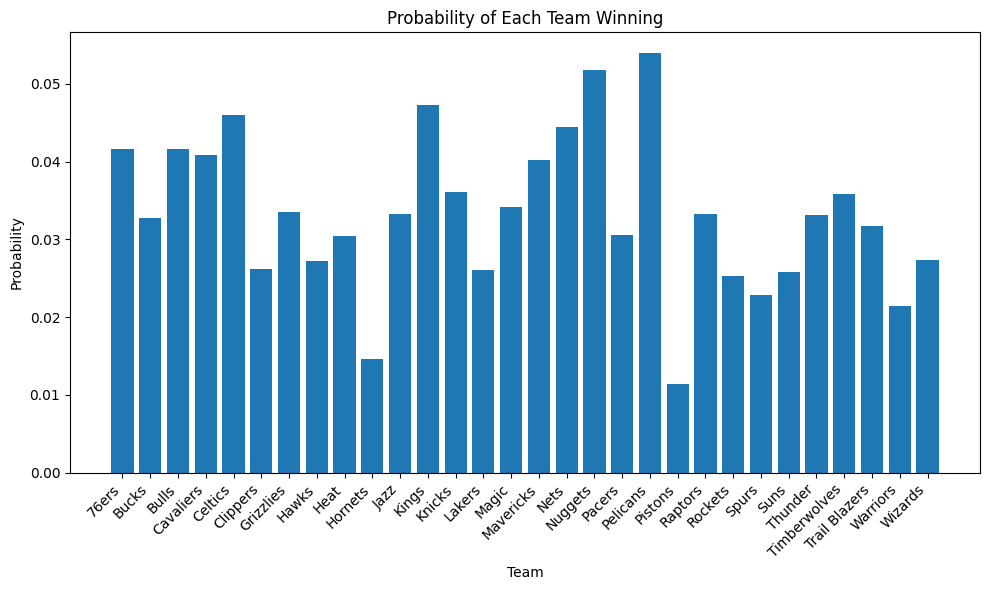

In [120]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("games.csv")

# Sort dataframe by date
df = df.sort_values(by='GAME_DATE_EST').reset_index(drop=True)

# Drop empty entries, data before 2004 contains NaN
df = df.loc[df['GAME_DATE_EST'] >= "2004-01-01"].reset_index(drop=True)

# Check for null values


# Load the team names
df_names = pd.read_csv('teams.csv')
df_names = df_names[['TEAM_ID', 'NICKNAME']]

# Replace 'HOME_TEAM_ID' with home names from df_names
home_names = df_names.copy()
home_names.columns = ['HOME_TEAM_ID', 'NICKNAME']
result_1 = pd.merge(df['HOME_TEAM_ID'], home_names, how="left", on="HOME_TEAM_ID")
df['HOME_TEAM_ID'] = result_1['NICKNAME']

# Replace 'VISITOR_TEAM_ID' with visitor names from  df_names
visitor_names = df_names.copy()
visitor_names.columns = ['VISITOR_TEAM_ID', 'NICKNAME']
result_2 = pd.merge(df['VISITOR_TEAM_ID'], visitor_names, how="left", on="VISITOR_TEAM_ID")
df['VISITOR_TEAM_ID'] = result_2['NICKNAME']

# Filter the data to include games after a certain date
df = df.loc[df['GAME_DATE_EST'] > '2020-08-01'].reset_index(drop=True)
df = df.loc[df['GAME_DATE_EST'] < '2021-08-01'].reset_index(drop=True)


columns = [
    'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
    'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'PTS_home', 'PTS_away'
]

df["Winning_Team"] = df.apply(lambda x: x["HOME_TEAM_ID"] if x["PTS_home"] > x["PTS_away"] else x["VISITOR_TEAM_ID"], axis=1)

X = df[columns]
y = df["Winning_Team"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm = SVC(probability=True)  # Set probability=True to enable probability estimation
svm.fit(X_train_scaled, y_train)

# Calculate the accuracy of the model
accuracy = svm.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

# Predict the probabilities of each team winning
probabilities = svm.predict_proba(X_test_scaled)
predicted_classes = svm.classes_

# Plot the probabilities
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(predicted_classes, probabilities[0])
plt.xlabel('Team')
plt.ylabel('Probability')
plt.title('Probability of Each Team Winning')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-labels
plt.tight_layout()  # Adjust spacing between columns
plt.show()

